# Linear Regression Analysis

### Content:
- Exploratory Data Analysis
- Linear Regression
- Model Performance Statistics

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#all visuals appear
%matplotlib inline

In [3]:
#import car listings data
path = '/Users/kimballwightman/Documents/CareerFoundry/Used Car Sales Analysis/'

In [4]:
df_cars = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','cars_scores.csv'), index_col = [0])

In [5]:
df_cars.head()

,Price,Year,Mileage,City,State,Make,Model,Price_Flag,Mileage_Flag,mileage_score,year_score,price_score
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed,Low Price,Low Mileage,7.1450,22.727273,3.693389
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed,Low Price,Low Mileage,3.9212,27.272727,4.678813
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed,Low Price,Low Mileage,9.7702,27.272727,3.693389
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed,Low Price,Low Mileage,7.9844,22.727273,4.736596
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic,Low Price,Low Mileage,4.4284,13.636364,6.714732


### EDA

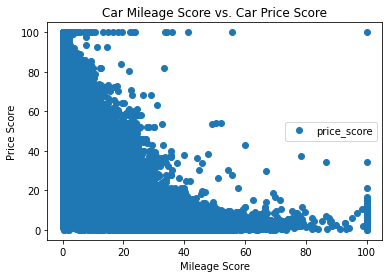

In [6]:
#explore data visually with a scatterplot
df_cars.plot(x = 'mileage_score', y='price_score',style='o')
plt.title('Car Mileage Score vs. Car Price Score')  
plt.xlabel('Mileage Score')  
plt.ylabel('Price Score')  
plt.show()

There are probably stronger linear relationships when grouped by car make, but we'll look at all cars for now. Overall, car price decreases as mileage gets higher.

### Linear Regression

In [7]:
#reshape variables into numpy arrays
X = df_cars['mileage_score'].values.reshape(-1,1)
y = df_cars['price_score'].values.reshape(-1,1)

In [8]:
X

array([[7.145 ],
       [3.9212],
       [9.7702],
       ...,
       [5.7882],
       [0.601 ],
       [0.5004]])

In [9]:
y

array([[ 3.69338886],
       [ 4.67881312],
       [ 3.69338886],
       ...,
       [68.64286164],
       [73.98450784],
       [95.08785188]])

In [10]:
#split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
#run a linear regression
regression = LinearRegression()

In [12]:
regression.fit(X_train, y_train)

LinearRegression()

In [13]:
y_predicted = regression.predict(X_test)

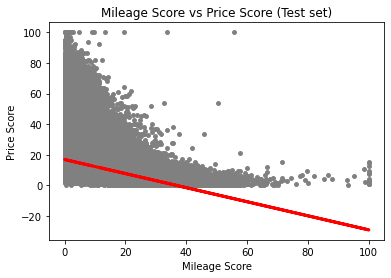

In [14]:
#plot a regression line on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Mileage Score vs Price Score (Test set)')
plot_test.xlabel('Mileage Score')
plot_test.ylabel('Price Score')
plot_test.show()

This is a poorly-fit regression line. Compared to the highest mileage cars, any observations with about half that mileage or more are predicted to have a price lower than the cheapest car listed for its make. Basically it's predicting negative prices for more extreme values in mileage, which exist. You can't have a negative price. Linear Regression probably isn't appropriate for this kind of distribution.

### Model Performance Statistics

In [15]:
#check the model performance statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [16]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.45960637]]
Mean squared error:  103.40718456016182
R2 score:  0.1230151283019626


In [17]:
#compare the predicted and actual values in a df
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.902404,13.005261
1,12.347069,16.429604
2,34.232404,12.419355
3,2.039063,7.855280
4,5.378410,10.046959
5,5.213764,6.686133
6,4.265842,-2.409385
7,16.173097,12.208396
8,5.230559,6.834310
9,2.792404,7.594775
